In [1]:
from utils.data import YfDataLoader, FinancialDataProcessor, Portfolio
from utils.optimization import diversification_ratio, get_weights_md

import matplotlib.pyplot as plt 
import numpy as np

%load_ext autoreload 
%autoreload 2 

SyntaxError: invalid syntax (data.py, line 74)

In [39]:
# Dataloading 

tickers = ['AGG', 'DBC', 'VTI', '^VIX']
start_date = "2011-01-01"
end_date = "2020-04-30"

fetcher = YfDataLoader(tickers=tickers, start_date=start_date, end_date=end_date)
price_data = fetcher.fetch_data()
preprocessing = FinancialDataProcessor()
returns = preprocessing.calculate_returns(price_data)
lagged_returns = returns.shift(1)

[*********************100%***********************]  4 of 4 completed


In [52]:
returns.columns

Index(['AGG', 'DBC', 'VTI', '^VIX'], dtype='object', name='Ticker')

In [40]:


cov = preprocessing.calculate_covariance(returns)
diversification_ratio(np.ones(4)/4,cov)


1.4485944602542735

<Axes: xlabel='Date'>

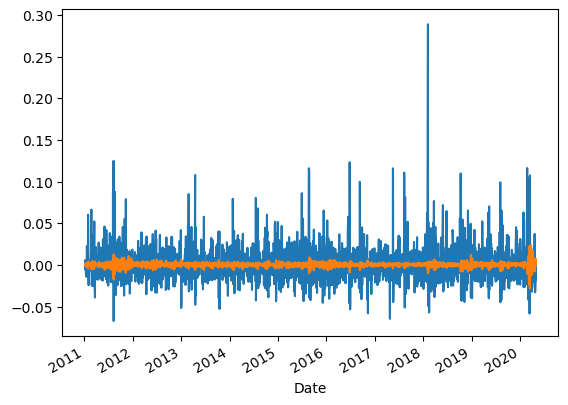

In [55]:
port = Portfolio(price_data)

p = port.returns

p['^VIX'].plot()
p['VTI'].plot()

In [58]:
port.portfolio_value

Date
2011-01-03    41.917995
2011-01-04    41.755188
2011-01-05    41.713619
2011-01-06    41.697677
2011-01-07    41.639426
                ...    
2020-04-23    71.513021
2020-04-24    70.589971
2020-04-27    70.349352
2020-04-28    70.418468
2020-04-29    70.846939
Length: 2346, dtype: float64